In [25]:
import pandas as pd

In [26]:
import seaborn as sns
%matplotlib inline

In [27]:
pd.set_option('display.max_colwidth', None)

In [28]:
data = pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')

In [29]:
n_articles = data.shape[0]
print(f'We have {n_articles} articles')


We have 30165 articles


In [30]:
# Sample articles from art category
data.loc[data.category=='ART'].sample(2)['text']

15031    emilie simon 24 ans jeune espoir de la chanson française très influencée par les musiques électroniques album emilie simon chez barclay/universal site www.emiliesimon.com a préparé sa tournée française à l'institut français de meknès au maroc elle est la première artiste à bénéficier d'une résidence chanson dans le cadre du programme génération musiques mis en place par l'association française d'action artistique afaa division culturelle du ministère des affaires étrangères ces résidences s'inspirent de ce qui se fait dans le secteur du théâtre et permettent aux lauréats de bénéficier de temps et de conditions adéquates pour préparer leurs spectacles l'afaa va ainsi proposer jusqu'en 2005 des résidences chanson à beyrouth m à alger les nubians mais aussi à casablanca damas fès le caire marrakech ... ces résidences se terminent toutes par un concert dans le lieu d'accueil pour emilie simon ce sera le 8 octobre avant onze dates françaises en octobre dont le 20 à paris à la cigal

In [31]:
# Sample articles from INT category
data.loc[data.category=='INT'].sample(2)

,text,category
25718,125 personnes ont péri dans l'explosion d'un oléoduc dans le sud-est du pays a indiqué dimanche 22 juin la croix-rouge nigériane des témoins avaient rapporté samedi que des villageois en quête de pétrole à onitsha amiyi-uhu à une cinquantaine de kilomètres au nord d'umuahia capitale de l'etat d'abia étaient morts brûlés lors de l'explosion juin d'un oléoduc dans lequel des pillards avaient pratiqué une brèche un marché noir intense alimenté par le pillage des 5 000 kilomètres d'oléoducs transportant les hydrocarbures raffinés à travers le pays s'est développé et les incendies mortels ne sont pas rares reuters,INT
4218,trois hauts responsables de l'ancien régime de saddam hussein ont été arrêtés en irak a annoncé mercredi 23 avril le commandement central américain centcom basé au qatar il s'agit de mouzahem saab hassan ancien commandant des forces de défense aérienne numéro 10 sur la liste des 52 personnes les plus recherchées par les militaires américains de l'ancien ministre du commerce de mohammed mehdi saleh 48e personnalité la plus recherchée et du chef du renseignement militaire le général zouheir taleb abdel sattar 21e sur la même liste selon le los angeles times le général sattar qui occupait le poste de chef du renseignement depuis juin 2002 s'est rendu dans l'un des anciens palais de saddam hussein occupé par les américains après être descendu de sa voiture avec à la main un attaché-case contenant quelques effets personnels ces trois arrestations auxquelles s'ajoute celle d'un autre responsable du renseignement irakien considérée comme non prioritaire par les militaires américains portent à onze le nombre d'ex-dignitaires irakiens capturés depuis la chute de la dictature,INT


<Axes: xlabel='count', ylabel='category'>

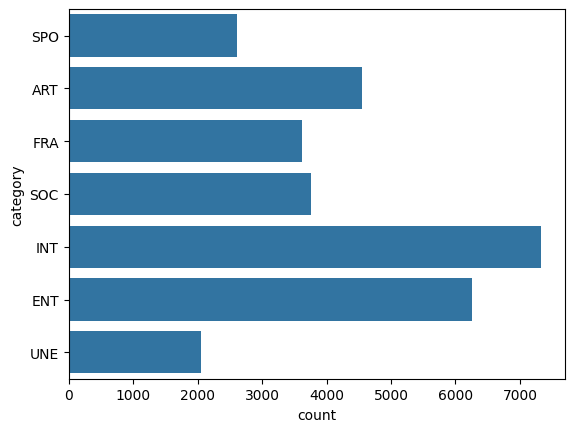

In [32]:
# Histogram of types
sns.countplot(data=data,y='category')

In [33]:
url_stopwords = "https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt"

In [34]:
stopwords = pd.read_csv(url_stopwords, header=None)

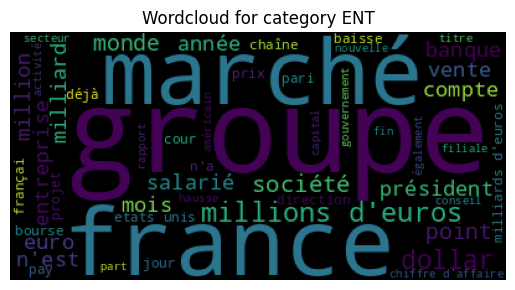

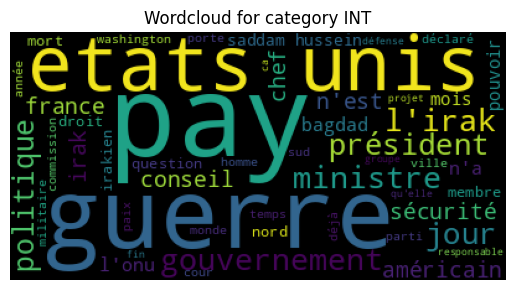

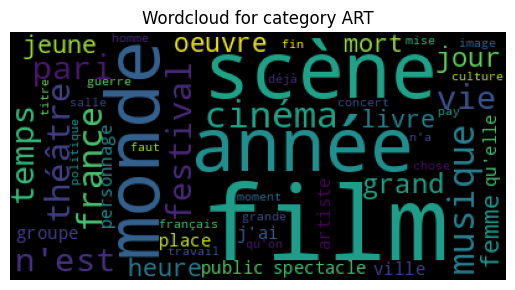

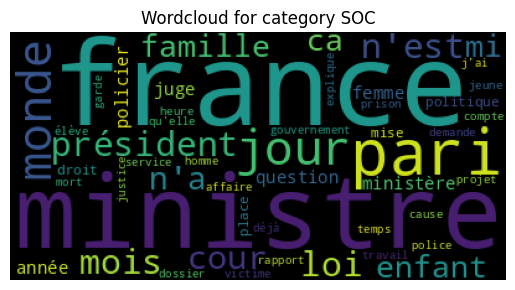

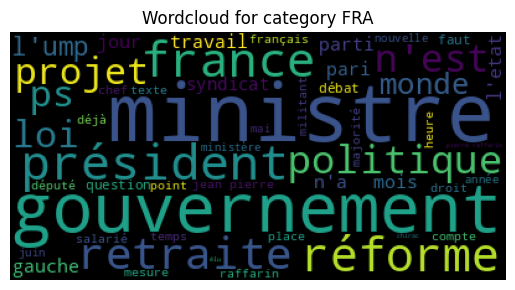

In [35]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
  alltexts = ' '.join([text for text in data.loc[data.category==cat]['text']])
  wordcloud = WordCloud(stopwords = stopwords[0].tolist(),  max_words = 50).generate(alltexts)
  plt.title('Wordcloud for category ' + cat)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data['text']
y = data['category']

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
 X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=200)
vectorizer = vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [40]:
X_train_counts

<24132x200 sparse matrix of type '<class 'numpy.int64'>'
	with 1364595 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [43]:
y_pred = clf.predict(X_test_counts)

In [44]:
success = 0
for element1, element2 in zip(y_pred, y_test) :
  if element1 == element2 :
    success +=1


In [45]:
# Success rate
success/len(y_test)

0.5553713527851459

In [46]:
# Il y en fait un fonction !
clf.score(X_test_counts, y_test, sample_weight=None)

# Mais ... ca donne la même chose

0.5553713527851459

In [47]:
# TF IDF representation

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

In [49]:
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

MultinomialNB()

In [50]:
clf.score(X_test_tf, y_test, sample_weight=None)

0.4993368700265252

In [51]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ART       0.71      0.66      0.68       469
         ENT       0.53      0.72      0.61       612
         FRA       0.46      0.54      0.50       371
         INT       0.74      0.57      0.64       738
         SOC       0.44      0.46      0.45       359
         SPO       0.53      0.45      0.49       254
         UNE       0.17      0.13      0.14       213

    accuracy                           0.56      3016
   macro avg       0.51      0.50      0.50      3016
weighted avg       0.57      0.56      0.55      3016



In [53]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

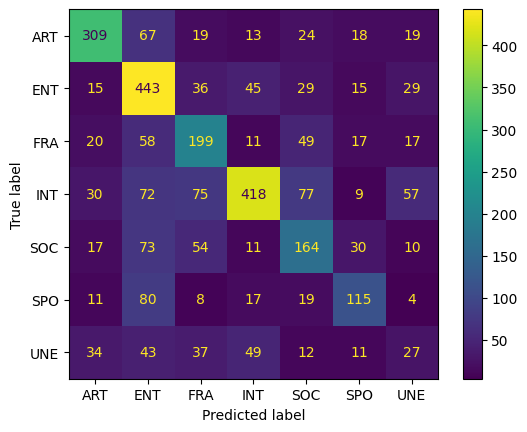

In [54]:
disp.plot()

In [55]:
## Remove the class UNE

In [56]:
data = data.loc[data.category!= 'UNE']

In [57]:
data.loc[data.category == 'FRA', 'category'] = 'SOC'

<ipython-input-57-5a073d3edd2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.category == 'FRA', 'category'] = 'SOC'


<Axes: xlabel='count', ylabel='category'>

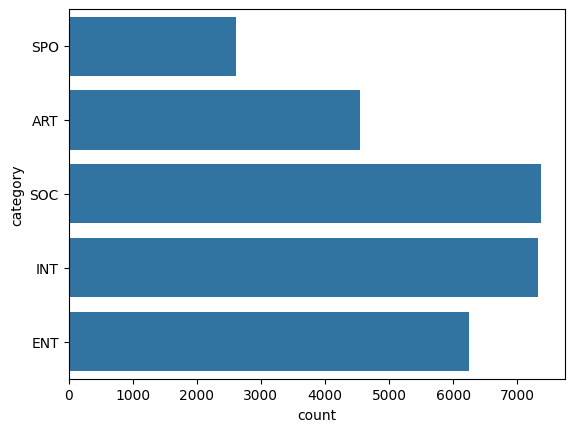

In [58]:
# Histogram of types
sns.countplot(data=data,y='category')

In [59]:
X = data['text']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=200)
vectorizer = vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

In [62]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [63]:
clf.score(X_test_tf, y_test, sample_weight=None)

0.5823550337958022

In [64]:
y_pred = clf.predict(X_test_counts)

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

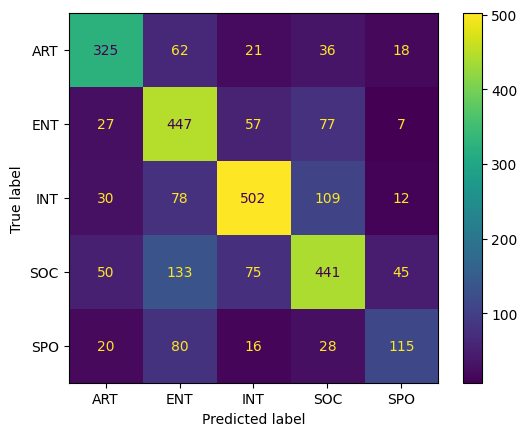

In [66]:
disp.plot()

In [67]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [74]:
text_test = [element for element in X_train ][0]

In [105]:
scores = []
for text in [element for element in X_train ][0:100]:
  zeroshot_preds = pipe(text, batch_size=16, candidate_labels=['Société', 'Entreprise', 'Arts', 'Sport' , 'International'])
  scores.append(zeroshot_preds['scores'])

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [106]:
winner = []
for element in scores:
  winner.append(np.argmax(element))

In [107]:
# Map en dictionnaire à faire
def dict_map(element):
  if element == 0 :
    return 'SOC'
  elif element == 1 :
    return 'ENT'
  elif element == 2:
    return 'ART'
  elif element == 3:
    return 'SPO'
  elif element == 4:
    return 'INT'

In [108]:
winner_label = [dict_map(element) for element in winner]

In [111]:
y_true = y_train.tolist()[0:100]

In [112]:
cm = confusion_matrix(y_true, winner_label, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

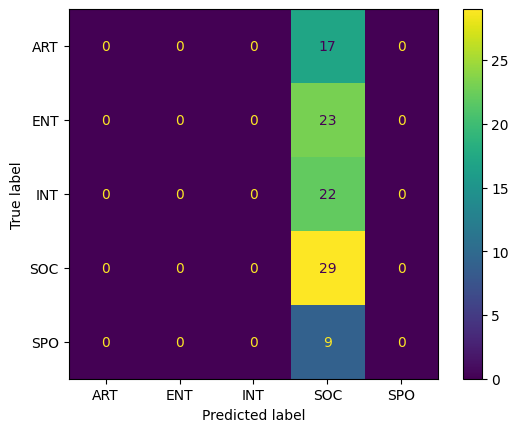

In [113]:
disp.plot()

In [ ]:
# Ca ne marche pas :( , il faut changer le label à chercher ?